# 10. 피부암 초기 진단

In [ ]:
# 피부암 데이터셋 불러오기
# https://teddylee777.github.io/kaggle/Kaggle-API-%EC%82%AC%EC%9A%A9%EB%B2%95/

!pip install kaggle
from google.colab import files
files.upload()

#kaggle api 업로드하기
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
!unzip /content/skin-cancer-mnist-ham10000.zip


In [ ]:
import numpy as np
import pandas as pd
import io
import os
from glob import glob

image_list = glob(os.path.join('/content/HAM10000_images_part_1/','*.jpg'))
image_list = image_list + glob(os.path.join('/content/HAM10000_images_part_2/','*.jpg'))
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in image_list}

imageid_path_dict

In [ ]:
data = pd.read_csv('/content/HAM10000_metadata.csv')
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
data.describe(exclude=[np.number])

,lesion_id,image_id,dx,dx_type,sex,localization
count,10015,10015,10015,10015,10015,10015
unique,7470,10015,7,4,3,15
top,HAM_0003789,ISIC_0027419,nv,histo,male,back
freq,6,1,6705,5340,5406,2192


In [ ]:
data.isna().any()

lesion_id       False
image_id        False
dx              False
dx_type         False
age              True
sex             False
localization    False
dtype: bool

In [ ]:
data.isna().any().sum()

1

In [ ]:
data['age'].fillna(value=int(data['age'].mean()), inplace=True)
data['age'] = data['age'].astype('int32')

In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi (nv)',
    'mel': 'Melanoma (mel)',
    'bkl': 'Benign keratosis-like lesions (bkl)',
    'bcc': 'Basal cell carcinoma (bcc)',
    'akiec': 'Actinic keratoses (akiec)',
    'vasc': 'Vascular lesions (vasc)',
    'df': 'Dermatofibroma (df)'
}

In [ ]:
data['cell_type'] = data['dx'].map(lesion_type_dict.get)
data['path'] = data['image_id'].map(imageid_path_dict.get)

In [ ]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80,male,scalp,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_1/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80,male,scalp,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_1/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80,male,scalp,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_1/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80,male,scalp,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_1/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75,male,ear,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_2/ISIC_0031633.jpg


In [ ]:
# 이미지 데이터 시각화하기

from PIL import Image
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data['image_pixel'] = data['path'].map(lambda x: np.asarray(Image.open(x).resize((28, 28))))

In [ ]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,path,image_pixel
0,HAM_0000118,ISIC_0027419,bkl,histo,80,male,scalp,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_1/ISIC_0027419.jpg,"[[[192, 153, 193], [195, 155, 192], [197, 154,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80,male,scalp,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_1/ISIC_0025030.jpg,"[[[27, 16, 32], [69, 49, 76], [122, 93, 126], ..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80,male,scalp,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_1/ISIC_0026769.jpg,"[[[192, 138, 153], [200, 144, 162], [202, 142,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80,male,scalp,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_1/ISIC_0025661.jpg,"[[[40, 21, 31], [95, 61, 73], [143, 102, 118],..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75,male,ear,Benign keratosis-like lesions (bkl),/content/HAM10000_images_part_2/ISIC_0031633.jpg,"[[[159, 114, 140], [194, 144, 173], [215, 162,..."


In [ ]:
sample_data = data.groupby('dx').apply(lambda df: df.iloc[0:2, [9, 7]])
sample_data


image_pixel  \
dx                                                              
akiec 9687  [[[30, 14, 19], [37, 21, 28], [94, 69, 73], [1...   
      9688  [[[38, 22, 22], [87, 67, 66], [135, 112, 110],...   
bcc   2462  [[[16, 11, 12], [58, 46, 48], [177, 153, 149],...   
      2463  [[[197, 177, 198], [202, 188, 205], [207, 194,...   
bkl   0     [[[192, 153, 193], [195, 155, 192], [197, 154,...   
      1     [[[27, 16, 32], [69, 49, 76], [122, 93, 126], ...   
df    1095  [[[173, 132, 123], [195, 151, 144], [204, 162,...   
      1096  [[[220, 172, 180], [229, 180, 179], [240, 192,...   
mel   1211  [[[151, 126, 129], [161, 132, 138], [168, 140,...   
      1212  [[[201, 172, 187], [201, 173, 188], [203, 178,...   
nv    64    [[[163, 135, 159], [167, 140, 167], [170, 144,...   
      1210  [[[229, 145, 164], [229, 138, 162], [226, 133,...   
vasc  2320  [[[218, 189, 211], [221, 192, 214], [223, 190,...   
      2321  [[[162, 132, 132], [173, 142, 147], [180, 150,...   

                                      cell_type  
dx                                               
akiec 9687            Actinic keratoses (akiec)  
      9688            Actinic keratoses (akiec)  
bcc   2462           Basal cell carcinoma (bcc)  
      2463           Basal cell carcinoma (bcc)  
bkl   0     Benign keratosis-like lesions (bkl)  
      1     Benign keratosis-like lesions (bkl)  
df    1095                  Dermatofibroma (df)  
      1096                  Dermatofibroma (df)  
mel   1211                       Melanoma (mel)  
      1212                       Melanoma (mel)  
nv    64                  Melanocytic nevi (nv)  
      1210                Melanocytic nevi (nv)  
vasc  2320              Vascular lesions (vasc)  
      2321              Vascular lesions (vasc)

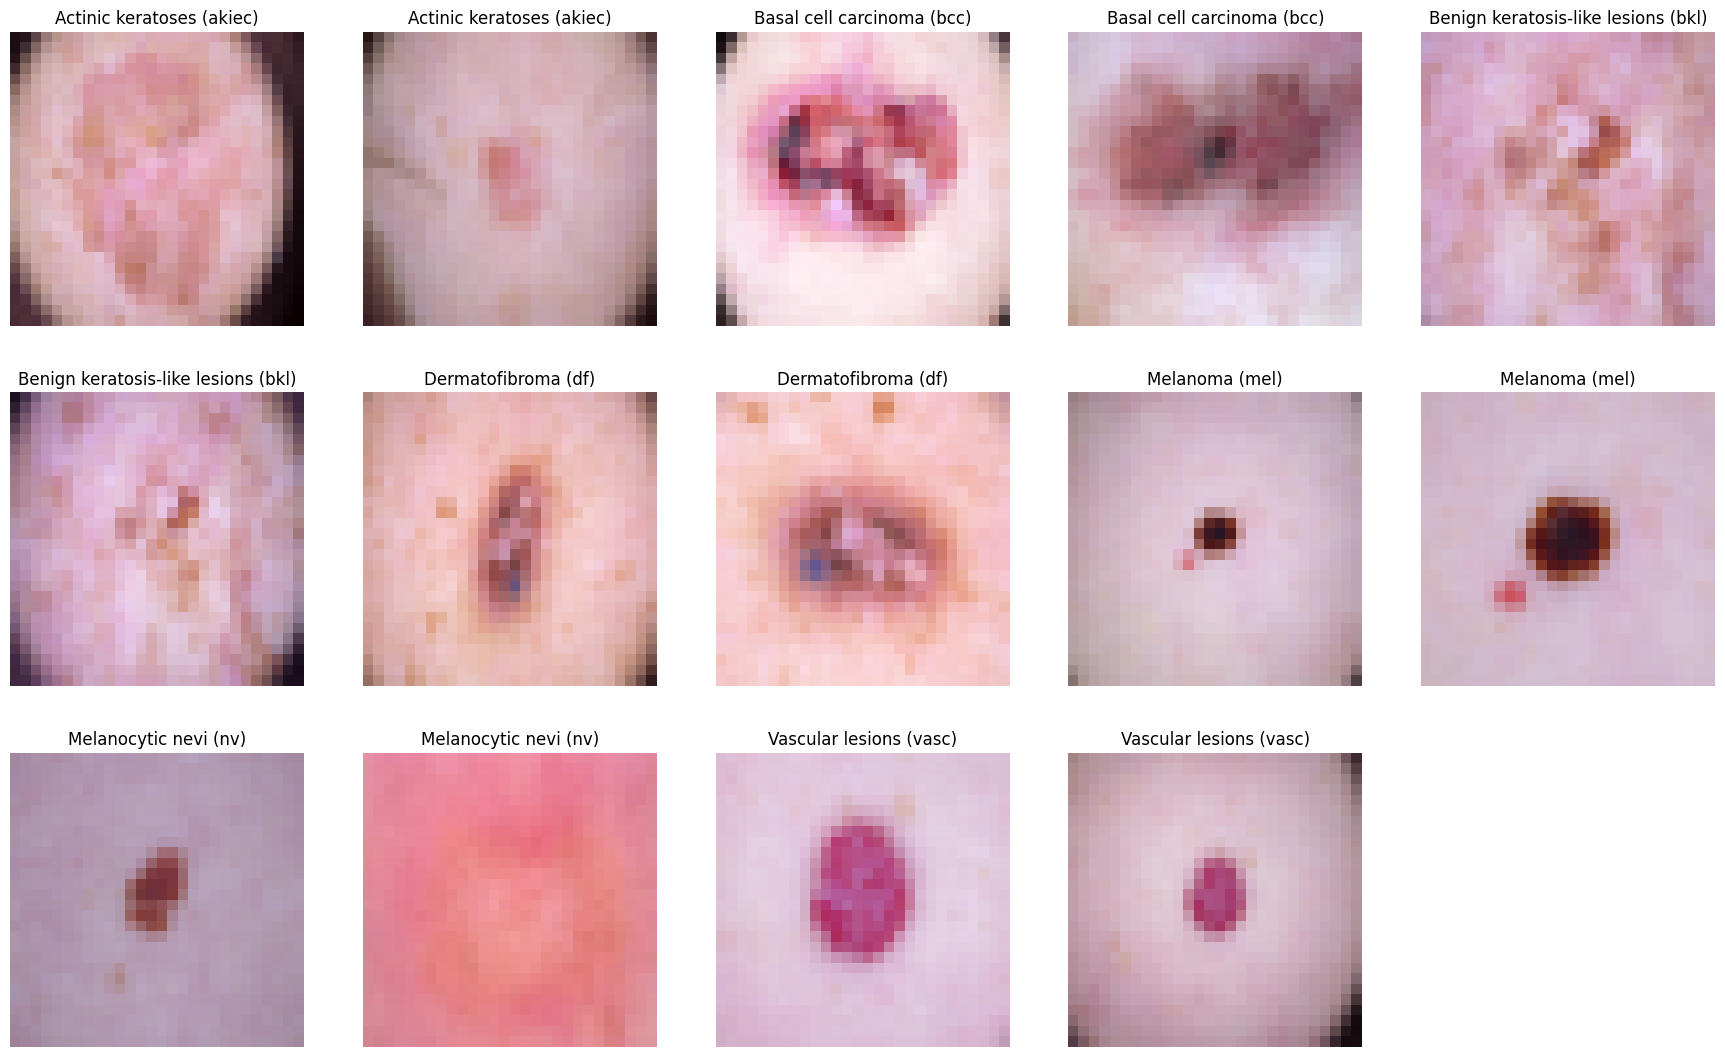

In [ ]:

plt.figure(figsize=(22, 32))
for i in range(14):
    plt.subplot(7, 5, i + 1)
    plt.imshow(np.squeeze(sample_data['image_pixel'][i]))
    plt.title(sample_data['cell_type'][i])
    plt.axis("off")
plt.show();

In [ ]:
# 이미지 데이터 전처리하기

label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}
reverse_label_mapping = dict((value, key) for key, value in label_mapping.items())



In [ ]:
data['label'] = data['dx'].map(reverse_label_mapping.get)

data = data.sort_values('label')
data = data.reset_index()

label
0    6705
1    1113
2    1099
3     514
4     327
5     142
6     115
Name: index, dtype: int64


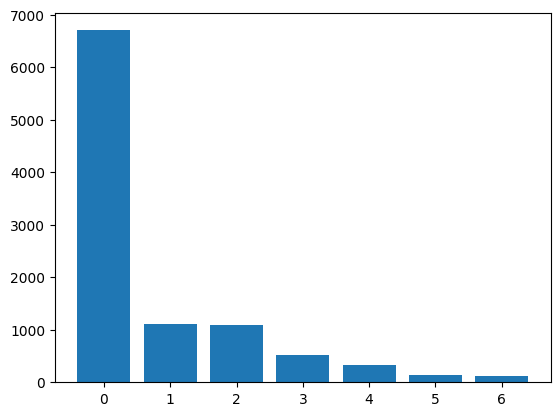

In [ ]:
plt.bar([0,1,2,3,4,5,6], data.groupby('label')['index'].count())
print(data.groupby('label')['index'].count())

In [ ]:
counter = 0
frames = [data]
for i in [4,4,11,17,45,52]:
    counter+=1
    index = data[data['label'] == counter].index.values
    df_index = data.iloc[int(min(index)):int(max(index)+1)]
    df_index = pd.concat([df_index]*(i+1), ignore_index = True)
    frames.append(df_index)

In [ ]:
final_data = pd.concat(frames)

print(data.shape)
print(final_data.shape)

(10015, 12)
(45756, 12)


label
0    6705
1    6678
2    6594
3    6682
4    6213
5    6674
6    6210
Name: index, dtype: int64


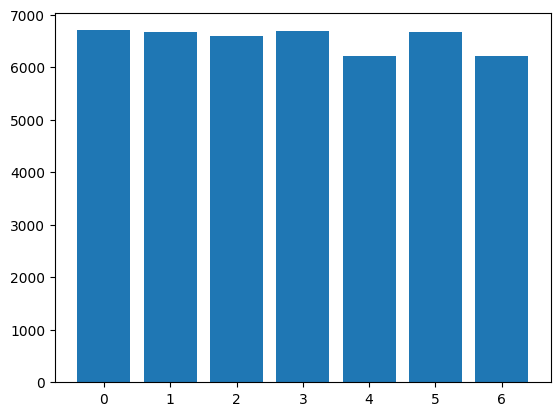

In [ ]:
plt.bar([0,1,2,3,4,5,6], final_data.groupby('label')['index'].count())
print(final_data.groupby('label')['index'].count())

In [ ]:
X_aug = final_data['image_pixel'].to_numpy()
X_aug = np.stack(X_aug, axis=0)
Y_aug = np.array(final_data.iloc[:, -1:])
print(X_aug.shape)
print(Y_aug.shape)

(45756, 28, 28, 3)
(45756, 1)


In [ ]:
# CNN 이미지 학습
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold

tf.random.set_seed(3)
X_train, X_test, Y_train, Y_test = train_test_split(X_aug, Y_aug, test_size=0.2, random_state=3)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 10,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  fill_mode = 'nearest')
train_datagen.fit(X_train)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen.fit(X_test)

In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2)))

    model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

    model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

    model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(7, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

    model.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = optimizer,
                  metrics = ['accuracy'])
    print(model.summary())
    return model;

In [ ]:
def train_model(model, X_train, Y_train, EPOCHS):
    early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, mode='auto')

    history = model.fit(X_train, Y_train, validation_split=0.2, batch_size = 64, epochs = EPOCHS,
                        callbacks = [reduce_lr, early_stop])
    return history

In [ ]:
def plot_model_training_curve(history):
    fig = make_subplots(rows=1, cols=2, subplot_titles=['Model Accuracy', 'Model Loss'])
    fig.add_trace(
        go.Scatter(
            y=history.history['accuracy'], name='train_acc'), row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_accuracy'], name='val_acc'), row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['loss'], name='train_loss'), row=1, col=2)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_loss'], name='val_loss'), row=1, col=2)
    fig.show()

In [ ]:

num_folds = 5
acc_per_fold=[]
loss_per_fold=[]
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)
fold_no=1
epochs = 50
model=create_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

In [ ]:
for train,test in kfold.split(X_train, Y_train):
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  history = train_model(model, X_train[train], Y_train[train],EPOCHS=epochs)
  plot_model_training_curve(history)

  scores = model.evaluate(X_train[test], Y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  model_file='skin_caner_5folds_'+str(fold_no)+'.h5'
  model.save(model_file)

  fold_no = fold_no + 1

In [ ]:
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.15689778327941895 - Accuracy: 97.19983339309692%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.030672309920191765 - Accuracy: 99.49460625648499%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.021395433694124222 - Accuracy: 99.56290125846863%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.029145482927560806 - Accuracy: 99.4536280632019%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.02227063849568367 - Accuracy: 99.54918026924133%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 99.05202984809875 (+- 0.9269233895776918)
> Loss: 0.052076329663395884
-------------------

In [ ]:
#CNN 모델 테스트하기
model_acc = model.evaluate(X_test, Y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 97.793%


In [ ]:
y_true = np.array(Y_test)
y_pred = model.predict(X_test)
y_pred = np.array(list(map(lambda x: np.argmax(x), y_pred)))
clr = classification_report(y_true, y_pred, target_names=label_mapping.values())
print(clr)

286/286 [==============================] - 13s 44ms/step
              precision    recall  f1-score   support

          nv       0.98      0.88      0.93      1373
         mel       0.94      0.99      0.96      1334
         bkl       0.95      0.99      0.97      1324
         bcc       0.99      1.00      0.99      1352
       akiec       1.00      1.00      1.00      1232
        vasc       1.00      1.00      1.00      1299
          df       1.00      1.00      1.00      1238

    accuracy                           0.98      9152
   macro avg       0.98      0.98      0.98      9152
weighted avg       0.98      0.98      0.98      9152



1/1 [==============================] - 1s 543ms/step


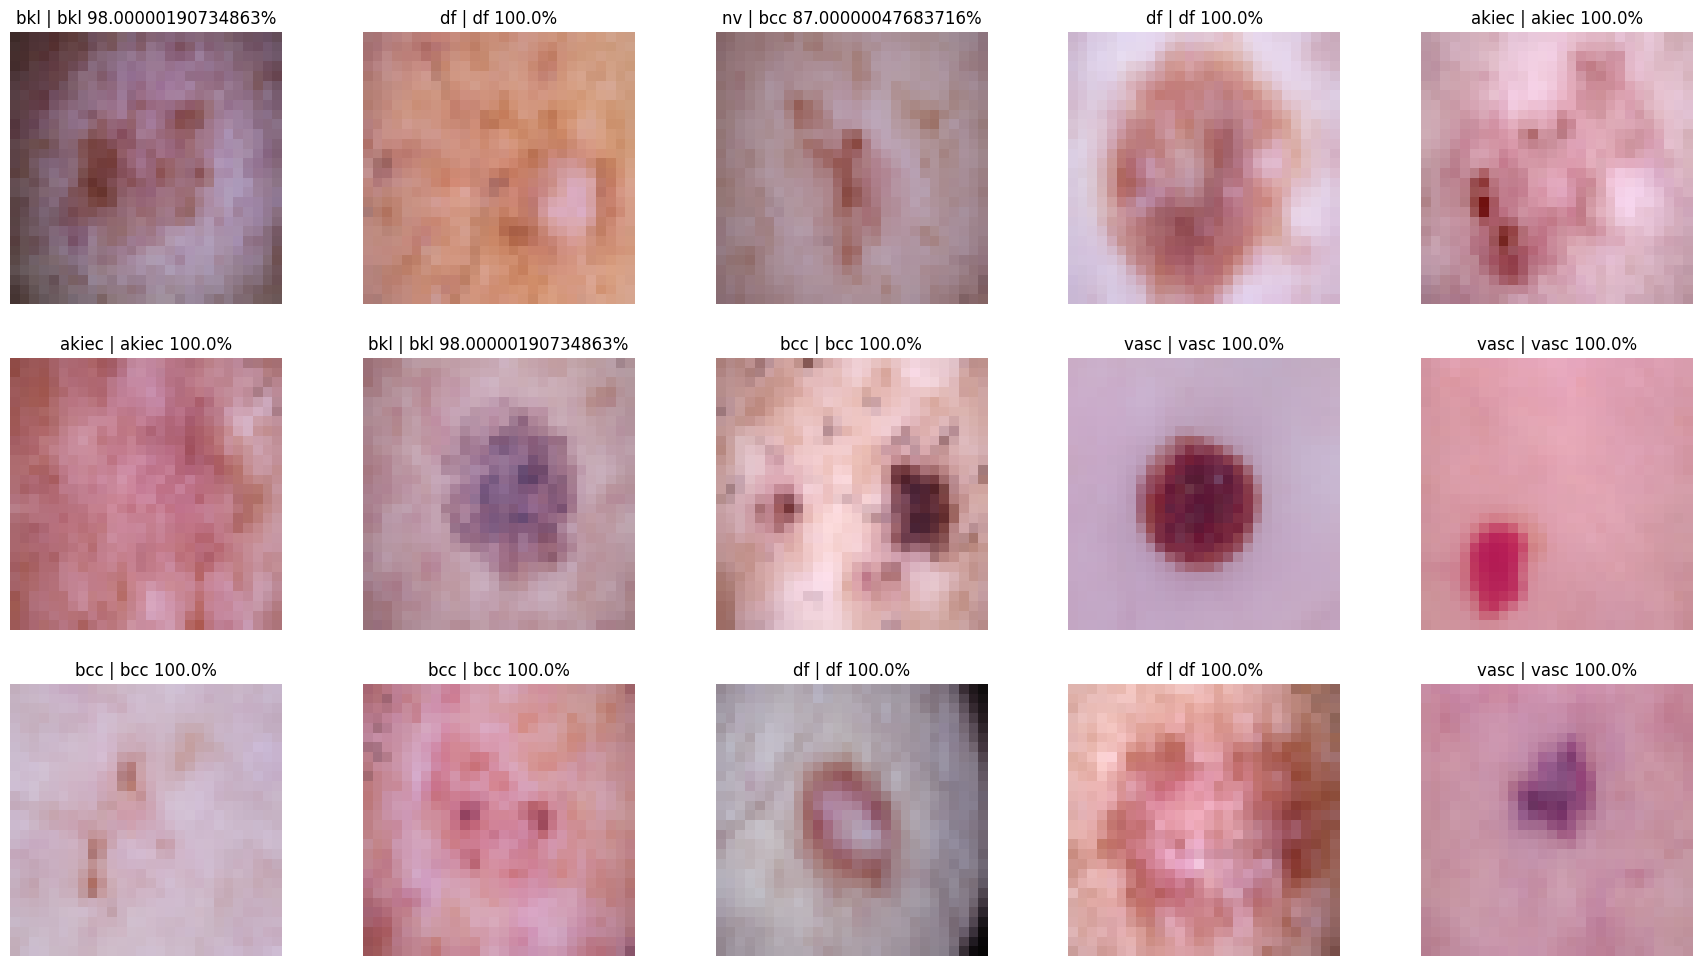

In [ ]:
sample_data = X_test[:15]
prediction = model.predict(sample_data)

plt.figure(figsize=(22, 12))
for i in range(15):
  plt.subplot(3, 5, i + 1)
  plt.imshow(sample_data[i])
  prediction_probability = np.amax(prediction[i]).round(2)
  plt.title(label_mapping[y_true[i][0]] + ' | ' + label_mapping[y_pred[i]] + ' ' + str(prediction_probability*100)+ '%' )
  plt.axis("off")
plt.show()


In [ ]:
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes, name, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(name)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()


In [ ]:
def create_confusion_matrix(model, x_test_normalized, y_test, cm_plot_labels, name, y_true,y_pred):

    y_predict_classes, y_true_classes = y_pred, y_true
    confusion_matrix_computed = confusion_matrix(y_true_classes, y_predict_classes)
    plot_confusion_matrix(confusion_matrix_computed, cm_plot_labels, name)


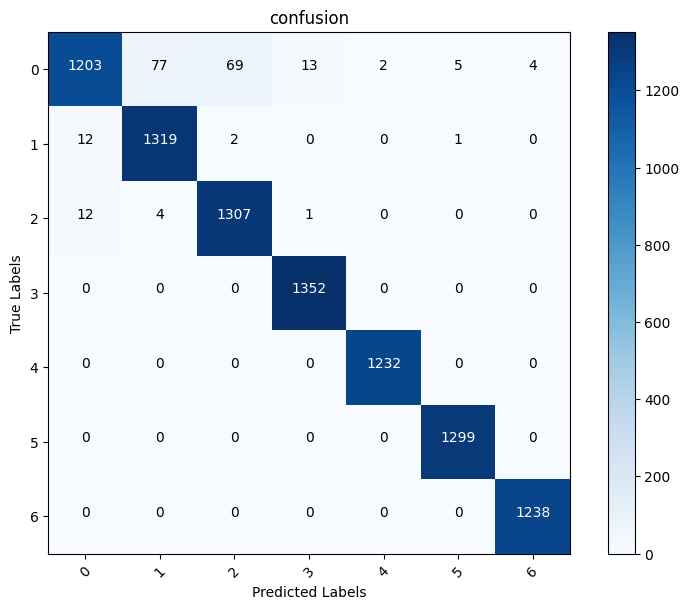

In [ ]:
create_confusion_matrix(model, X_test, Y_test, label_mapping, 'confusion', y_true, y_pred)


In [ ]:

files.upload()

{}

In [ ]:

test_img = image.load_img('/content/Mack_Horton_Skin.jpg', target_size=((28,28)))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
prediction = model.predict(test_img)
prediction_idx = np.argmax(prediction)
test_image = plt.imread('/content/Mack_Horton_Skin.jpg')
plt.imshow(test_image)
plt.title('Prediction Result :' + label_mapping[prediction_idx])
plt.axis("off")



In [ ]:
print('===============================')
print('prediction per disease')
print('===============================')
for i in range(7):
  print(f'> {label_mapping[i]} : {(prediction[0][i]*100).round(2)} %')
print('===============================')